In [526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


from tensorflow.keras.utils import to_categorical

tfidf = TfidfVectorizer(stop_words=set(stopwords.words('english')),max_features=100)


In [490]:
train_df = pd.read_csv("Datasets\Ecommerce\\train_data.csv")
test_df = pd.read_csv("Datasets\Ecommerce\\test_data.csv")
test_val_df = pd.read_csv("Datasets\Ecommerce\\test_data_hidden.csv")
train_df.shape,test_df.shape

((4000, 8), (1000, 7))

In [491]:
train_df.duplicated().sum(), test_df.duplicated().sum(), test_val_df.duplicated().sum()

(58, 3, 3)

In [492]:
train_df.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,3990,4000
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,100,3749


In [493]:
train_df.dtypes

name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

In [494]:
test_df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [495]:
test_df.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
count,1000,1000,1000,1000,1000,1000,997
unique,23,1,23,4,366,979,796
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,This device meets the needs of my grandson. He...,Great tablet
freq,169,1000,169,676,26,2,22


In [496]:
test_val_df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [497]:
test_val_df.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,1000,1000,1000,1000,1000,1000,997,1000
unique,23,1,23,4,366,979,796,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,This device meets the needs of my grandson. He...,Great tablet,Positive
freq,169,1000,169,676,26,2,22,937


In [498]:
train_df.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [499]:
test_df.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
dtype: int64

In [500]:
train_df["sentiment"].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [501]:
Positive_Review_Text = ""
for review in  train_df[train_df["sentiment"]=="Positive"]["reviews.text"]:
  Positive_Review_Text += " " +review.lower()

Negative_Review_Text = ""
for review in  train_df[train_df["sentiment"]=="Negative"]["reviews.text"]:
  Negative_Review_Text += " " +review.lower()

Neutral_Review_Text = ""
for review in  train_df[train_df["sentiment"]=="Neutral"]["reviews.text"]:
  Neutral_Review_Text += " " +review.lower()


In [502]:
class WordCloudGeneration:
    def preprocessing(self, data):
        data = data.split(".")
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        return preprocessed_data

    def create_word_cloud(self, final_data,title=""):
        final_data=self.preprocessing(final_data)

        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="white").generate(final_data)
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(title,fontsize=40)
        plt.show()

        
wordcloud_generator = WordCloudGeneration()

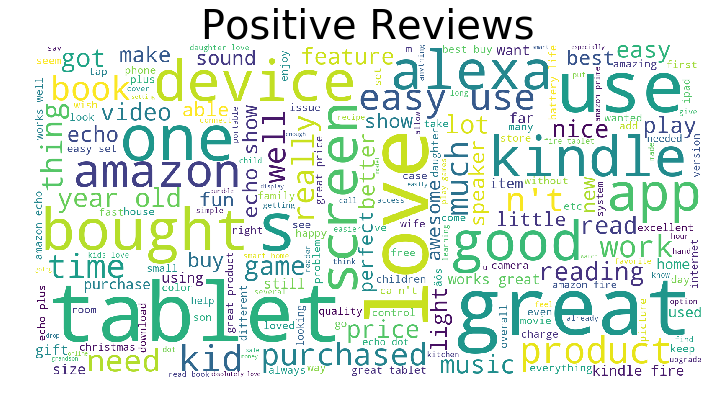

In [503]:

wordcloud_generator.create_word_cloud(Positive_Review_Text,"Positive Reviews")

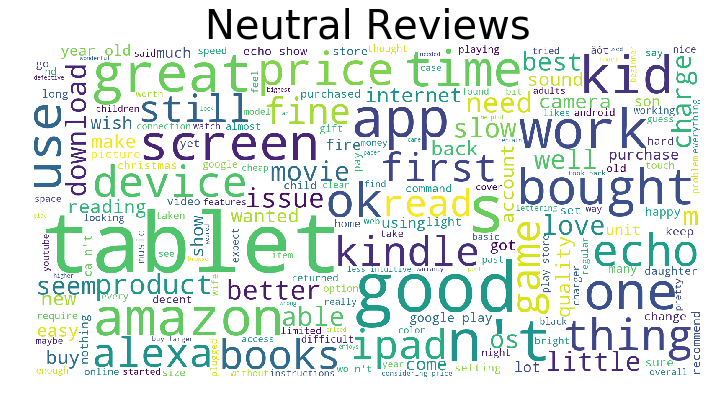

In [504]:
wordcloud_generator.create_word_cloud(Neutral_Review_Text,"Neutral Reviews")

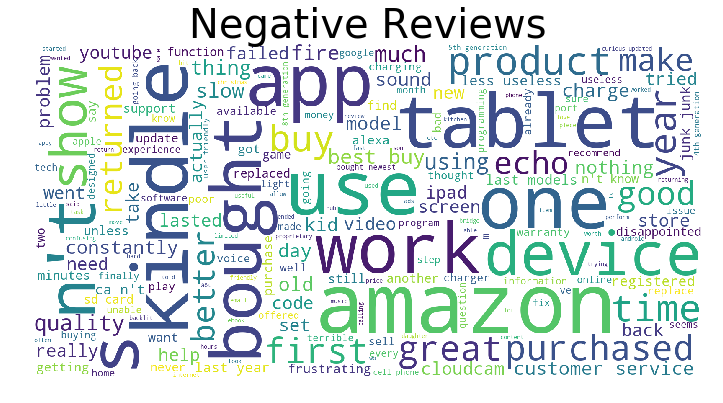

In [505]:
wordcloud_generator.create_word_cloud(Negative_Review_Text,"Negative Reviews")

# Observations 

Duplicates found in all datasets:
Only one brand. - brand column can be dropped:

name, categories, primaryCategories, and sentiment are categorical:
LabelEncoder

reviews.date to be converted to DateTime (Drop or not?):

reviews.text and reviews.title are text:
TFIDF

null values in reviews.title:

class imbalance issue:
undersampling
oversampling



# Tasks based on observations

Remove Duplicates

In [506]:
train_df=train_df[train_df.duplicated()==False]
test_df=test_df[test_df.duplicated()==False]
test_val_df=test_val_df[test_val_df.duplicated()==False]

train_df.reset_index(inplace=True)
test_val_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

fill null values

In [507]:
train_df['reviews.title'].fillna(value='',inplace=True)
test_val_df['reviews.title'].fillna(value=' ',inplace=True)
test_df['reviews.title'].fillna(value=' ',inplace=True)

Drop Brand Category

In [508]:
train_df.drop("brand",inplace=True,axis=1)
test_df.drop("brand",inplace=True,axis=1)
test_val_df.drop("brand",inplace=True,axis=1)

Encode categories

In [509]:
def to_labels(series):
  le=LabelEncoder()
  return le.fit_transform(series)

categories = ["name","categories","primaryCategories","sentiment"]

for cat in categories:
  train_df[cat]=to_labels(train_df[cat])
  test_val_df[cat]=to_labels(test_val_df[cat])
  if not cat=="sentiment":
    test_df[cat]=to_labels(test_df[cat])


train_df.shape,test_df.shape,test_val_df.shape

((3942, 8), (997, 7), (997, 8))

Vectorize text with Tfidf

In [537]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def get_tfidf(series):
  new_series=[]
  for review in series:
    toks = word_tokenize(review)
    toks_sans_stopwords = [word for word in toks if not word in set(stopwords.words('english'))]
    review_lemma = lemmatizer.lemmatize(" ".join(toks_sans_stopwords))
    new_series.append(review_lemma)
  result=pd.DataFrame(tfidf.fit_transform(new_series).toarray())
  return result

In [538]:
train_df=pd.concat((train_df,get_tfidf(train_df["reviews.text"])),axis=1).drop("reviews.text",axis=1)
test_df=pd.concat((test_df,get_tfidf(test_df["reviews.text"])),axis=1).drop("reviews.text",axis=1)
test_val_df=pd.concat((test_val_df,get_tfidf(test_val_df["reviews.text"])),axis=1).drop("reviews.text",axis=1)

train_df=pd.concat((train_df,get_tfidf(train_df["reviews.title"])),axis=1).drop("reviews.title",axis=1)
test_df=pd.concat((test_df,get_tfidf(test_df["reviews.title"])),axis=1).drop("reviews.title",axis=1)
test_val_df=pd.concat((test_val_df,get_tfidf(test_val_df["reviews.title"])),axis=1).drop("reviews.title",axis=1)

In [539]:

X_train = np.array(train_df.drop(["sentiment","reviews.date"],axis=1))
y_train = np.array(train_df["sentiment"])
y_test = np.array(test_val_df["sentiment"])

X_test = np.array(test_df.drop(["reviews.date"],axis=1))

# Multinomial Naive Bayes Classification

In [540]:
model = MultinomialNB()

In [541]:
model.fit(X_train,y_train)

MultinomialNB()

In [542]:
preds=model.predict(X_test)

In [543]:
pd.DataFrame(confusion_matrix(y_test,preds),columns=["negative","neutral","positive"],index=["negative","neutral","positive"])

,negative,neutral,positive
negative,2,7,15
neutral,0,12,27
positive,51,248,635


In [544]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.04      0.08      0.05        24
           1       0.04      0.31      0.08        39
           2       0.94      0.68      0.79       934

    accuracy                           0.65       997
   macro avg       0.34      0.36      0.31       997
weighted avg       0.88      0.65      0.74       997

